Exploratory data analysis for convex relaxations of the formulation. Results are summarized in the thesis.

In [2]:
from typing import Dict, List
from opt_trans.data_handling.experiment_data import Query
from opt_trans.experiment import Experiment
from experiment_data import Database


def extract_info(solver_options):
    vars = solver_options.split(" ")
    info = {}
    for v in vars:
        key, value = v.split("=")
        info[key] = value

    # return tuple
    return tuple(info.items())


folder = "../relaxation_runs"

db = Database.populate_from_folder(folder)

query = Query()

indexed_db = db.index_on("solver_options")

print(len(indexed_db.keys()))

temp_db = {}
for k, v in indexed_db.items():
    temp_db[extract_info(k[1])] = v

indexed_db = temp_db

true_sol_db = Database.populate_from_folder("../relaxation_runs_real_solutions")

384


# Analysis of the relaxation with most basic formulation and $\alpha=0$ $n=5$

All the runs have been done on BARON.
Convex hull, better objective function, first steiner are all turned off due to time constraints

In [3]:

lb = [e.results["lower_bound"] for e in db.experiments]
ub = [e.results["upper_bound"] for e in db.experiments]

true_obj = [e.results["objective"] for e in true_sol_db.experiments]

print(f"Lower bound mean: {sum(lb) / len(lb)}")
print(f"Upper bound mean: {sum(ub) / len(ub)}")

print(f"Lower bound median: {sorted(lb)[len(lb) // 2]}")
print(f"Upper bound median: {sorted(ub)[len(ub) // 2]}")

slb = sum(lb) / len(lb)
sub = sum(ub) / len(ub)

print(f"Lower bound std: {sum([(l - slb) ** 2 for l in lb]) / len(lb)}")
print(f"Upper bound std: {sum([(u - sub) ** 2 for u in ub]) / len(ub)}")

Lower bound mean: 0.12336244377310784
Upper bound mean: 1.7794238600663936
Lower bound median: 0.0
Upper bound median: 1.6812460868025412
Lower bound std: 0.1975043137044825
Upper bound std: 0.3824184698291171


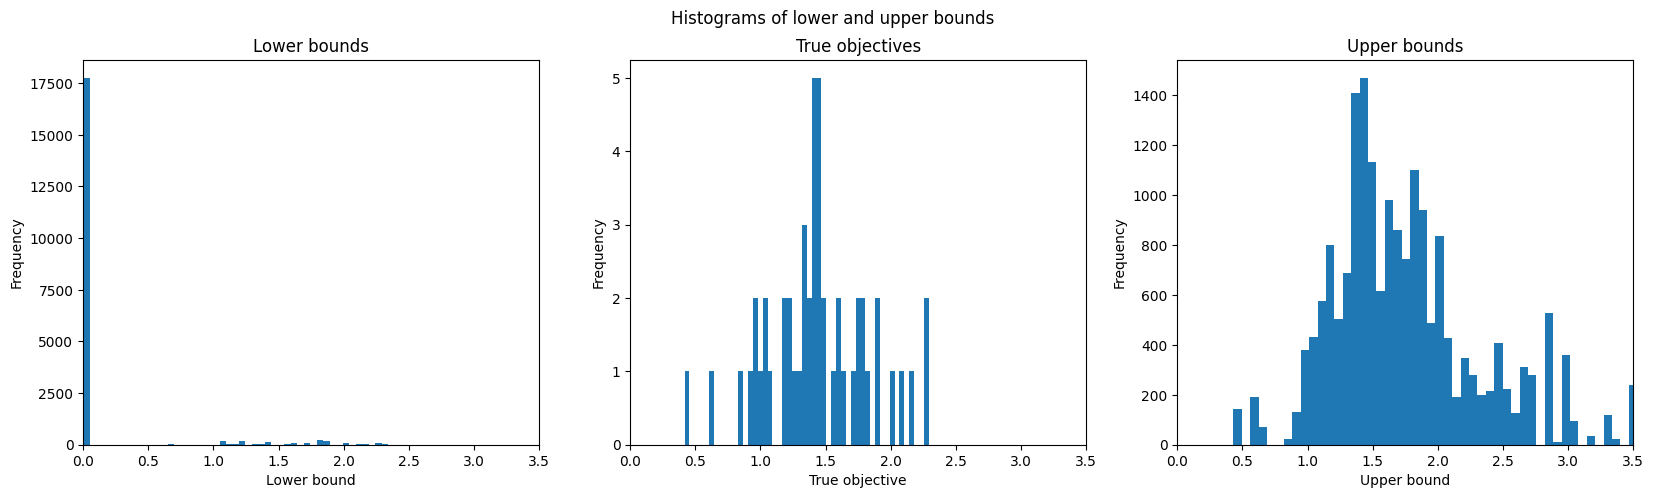

In [4]:
import matplotlib.pyplot as plt

# hist for lb and ub
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Histograms of lower and upper bounds")
ax[0].hist(lb, bins=50)
ax[0].set_title("Lower bounds")
ax[0].set_xlabel("Lower bound")
ax[0].set_ylabel("Frequency")

ax[2].hist(ub, bins=50)
ax[2].set_title("Upper bounds")
ax[2].set_xlabel("Upper bound")
ax[2].set_ylabel("Frequency")

ax[1].hist(true_obj, bins=50)
ax[1].set_title("True objectives")
ax[1].set_xlabel("True objective")
ax[1].set_ylabel("Frequency")

# set x lims to 0 3.5 for all

ax[0].set_xlim(0, 3.5)
ax[1].set_xlim(0, 3.5)
ax[2].set_xlim(0, 3.5)

plt.show()


Max lower bound: 0.569397960825311, max_k=(('MaxIter', '1'), ('DoLocal', '0'), ('NumLoc', '10'), ('TDo', '1'), ('MDo', '1'), ('LBTTDo', '1'), ('OBTTDo', '1'), ('PDo', '-2'))


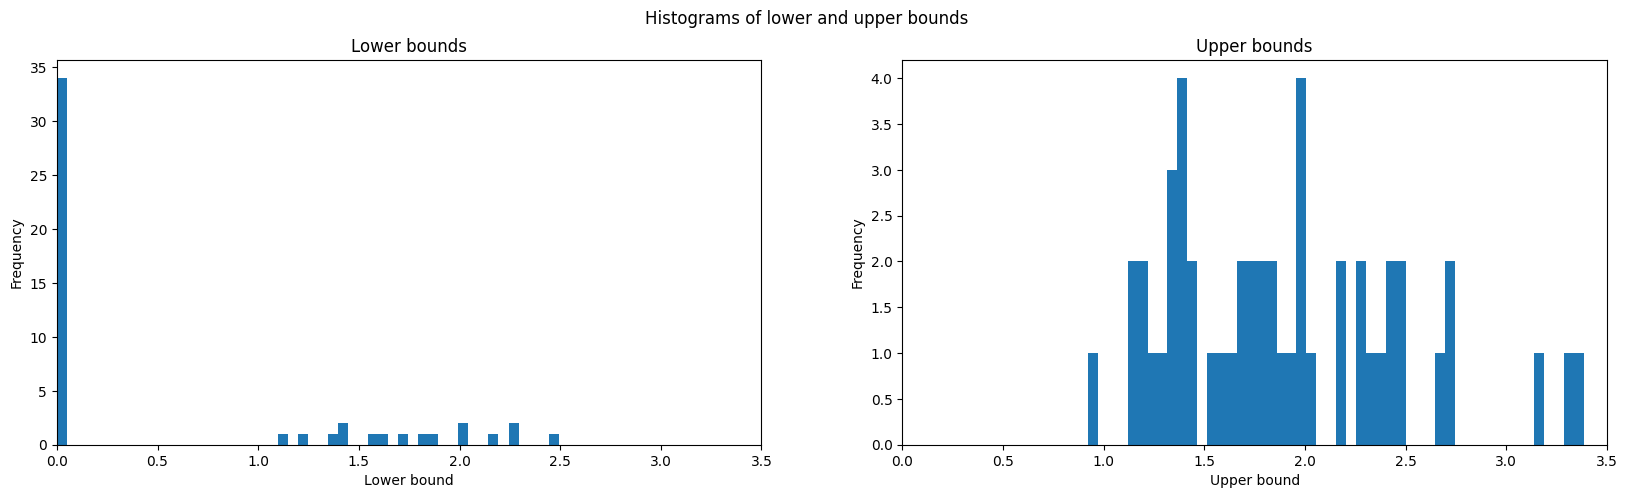

In [16]:
max_lb = 0
max_k = None

for k, v in indexed_db.items():

    lb = [e.results["lower_bound"] for e in v]

    mean_lb = sum(lb) / len(lb)

    if mean_lb > max_lb:
        max_lb = mean_lb
        max_k = k

print(f"Max lower bound: {max_lb}, {max_k=}")

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle("Histograms of lower and upper bounds")
ax[0].hist([e.results["lower_bound"] for e in indexed_db[max_k]], bins=50)
ax[0].set_title("Lower bounds")
ax[0].set_xlabel("Lower bound")
ax[0].set_ylabel("Frequency")

ax[1].hist([e.results["upper_bound"] for e in indexed_db[max_k]], bins=50)
ax[1].set_title("Upper bounds")
ax[1].set_xlabel("Upper bound")
ax[1].set_ylabel("Frequency")

ax[0].set_xlim(0, 3.5)
ax[1].set_xlim(0, 3.5)

plt.show()

Lower bound mean: 0.0
Upper bound mean: 1.7897855107300222


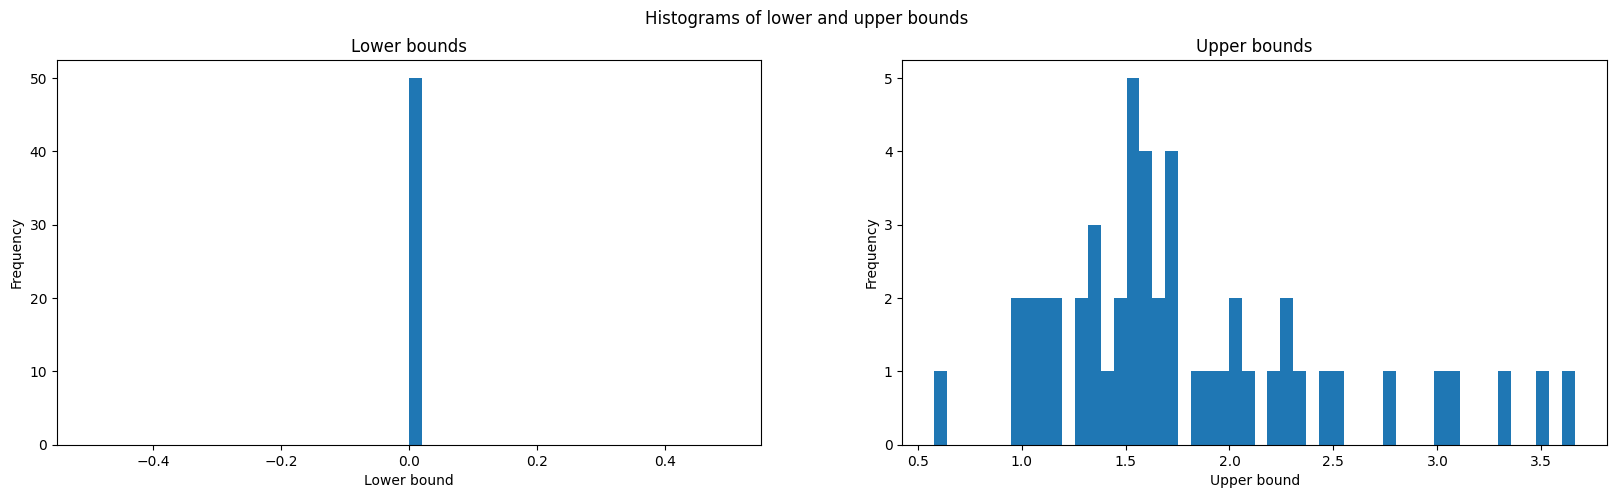

In [6]:
# all disabled
key_disabled = (
    ('MaxIter', '1'), ('DoLocal', '0'), ('NumLoc', '10'), ('TDo', '0'), ('MDo', '0'), ('LBTTDo', '0'), ('OBTTDo', '0'),
    ('PDo', '0'))
lb = [e.results["lower_bound"] for e in indexed_db[key_disabled]]
ub = [e.results["upper_bound"] for e in indexed_db[key_disabled]]

print(f"Lower bound mean: {sum(lb) / len(lb)}")
print(f"Upper bound mean: {sum(ub) / len(ub)}")

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle("Histograms of lower and upper bounds")
ax[0].hist(lb, bins=50)
ax[0].set_title("Lower bounds")
ax[0].set_xlabel("Lower bound")
ax[0].set_ylabel("Frequency")

ax[1].hist(ub, bins=50)
ax[1].set_title("Upper bounds")
ax[1].set_xlabel("Upper bound")
ax[1].set_ylabel("Frequency")

plt.show()

In [7]:
import pandas as pd
import statsmodels.api as sm

# Sample dictionary
# data_dict = {k: v.results["lower_bound"] for k, v in indexed_db.items()}
data_dict = []
for k, v in indexed_db.items():
    for e in v:
        data_dict.append((k, e.results["lower_bound"]))

# Convert the dictionary into a DataFrame
rows = []
for (key, value) in data_dict:
    row = {k[0]: k[1] for k in key if k[0] != "MaxIter"}
    row['Value'] = value
    rows.append(row)

df = pd.DataFrame(rows)
df = df.dropna()
# convert df to int types
df = df.astype(
    {"DoLocal": int, "NumLoc": int, "TDo": int, "MDo": int, "LBTTDo": int, "OBTTDo": int, "PDo": int, "Value": float})
# set all those int to categorical variables
df = df.astype({"DoLocal": "category", "NumLoc": "category", "TDo": "category", "MDo": "category", "LBTTDo": "category",
                "OBTTDo": "category", "PDo": "category", "Value": "float"})
df.dtypes

DoLocal    category
NumLoc     category
TDo        category
MDo        category
LBTTDo     category
OBTTDo     category
PDo        category
Value       float64
dtype: object

In [8]:
import statsmodels.formula.api as smf

# Convert categorical columns to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop(columns='Value')
y = df_encoded['Value']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model

model = smf.ols(formula="Value ~ C(DoLocal) + C(NumLoc) + C(TDo) + C(MDo) + C(LBTTDo) + C(OBTTDo) + C(PDo)",
                data=df).fit()
# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.06e-239
Time:                        09:27:16   Log-Likelihood:                -11098.
No. Observations:               19200   AIC:                         2.222e+04
Df Residuals:                   19188   BIC:                         2.231e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0106      0.011     

# Analysis depending on the formulation

We repeat the above analysis but varying the formulation arguments and a subset of the solver options

In [9]:
db_form = Database.populate_from_folder("../relaxation_runs_formulation_grid")

indexed_db_form = db_form.index_on("solver_options", "formulation_arguments")

for k in indexed_db_form.keys():
    print(k)

('solver_options', 'MaxIter=1 DoLocal=0 NumLoc=-2 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=-1', 'formulation_arguments', frozenset({('use_obj_lb', False), ('use_convex_hull', True), ('use_better_obj', True), ('use_bind_first_steiner', False)}))
('solver_options', 'MaxIter=1 DoLocal=0 NumLoc=-2 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=-1', 'formulation_arguments', frozenset({('use_obj_lb', False), ('use_convex_hull', True), ('use_better_obj', False), ('use_bind_first_steiner', False)}))
('solver_options', 'MaxIter=1 DoLocal=0 NumLoc=-2 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=-1', 'formulation_arguments', frozenset({('use_convex_hull', False), ('use_obj_lb', False), ('use_better_obj', True), ('use_bind_first_steiner', False)}))
('solver_options', 'MaxIter=1 DoLocal=0 NumLoc=-2 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=-1', 'formulation_arguments', frozenset({('use_convex_hull', False), ('use_obj_lb', False), ('use_better_obj', False), ('use_bind_first_steiner', False)}))
('solver_options', 'MaxIter=1 DoLocal=0 NumL

In [10]:

lb = [e.results["lower_bound"] for e in db_form.experiments]
ub = [e.results["upper_bound"] for e in db_form.experiments]

true_obj = [e.results["objective"] for e in true_sol_db.experiments]

# print statistical properties of the lower and upper bounds
print(f"Lower bound mean: {sum(lb) / len(lb)}")
print(f"Upper bound mean: {sum(ub) / len(ub)}")

print(f"Lower bound median: {sorted(lb)[len(lb) // 2]}")
print(f"Upper bound median: {sorted(ub)[len(ub) // 2]}")

slb = sum(lb) / len(lb)
sub = sum(ub) / len(ub)
# std
print(f"Lower bound std: {sum([(l - slb) ** 2 for l in lb]) / len(lb)}")
print(f"Upper bound std: {sum([(u - sub) ** 2 for u in ub]) / len(ub)}")


Lower bound mean: -1e+50
Upper bound mean: 1.7e+49
Lower bound median: 0.0
Upper bound median: 2.054881403681484
Lower bound std: 9e+100
Upper bound std: 1.6710999999999998e+100


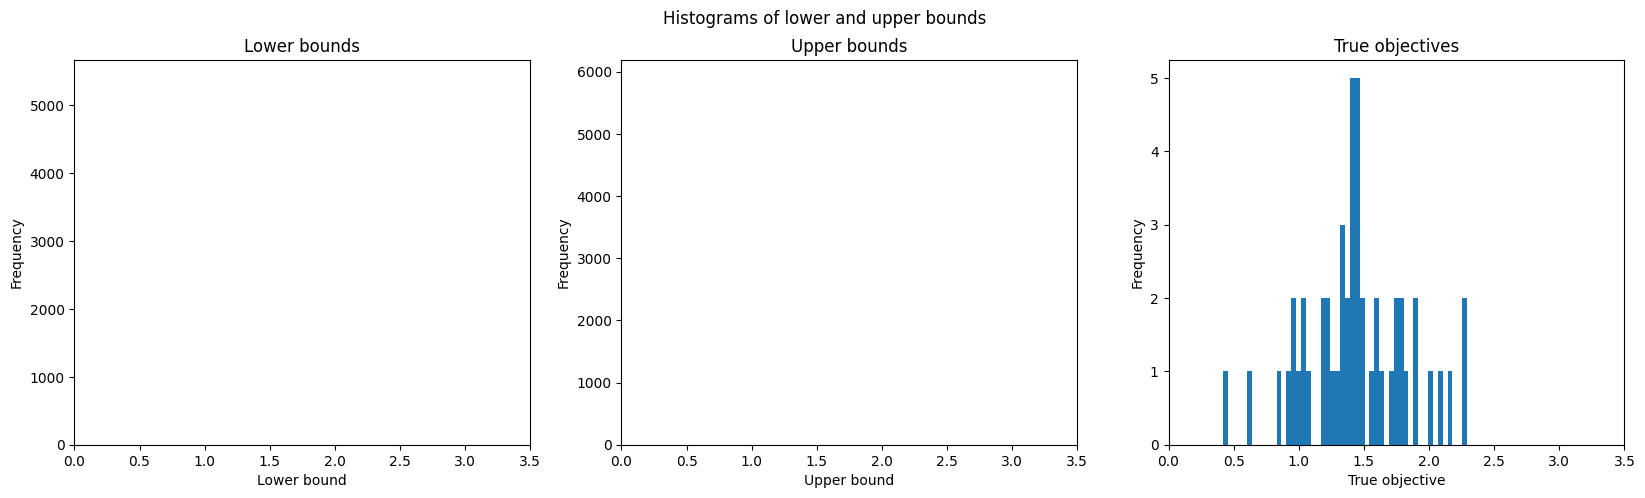

In [11]:
import matplotlib.pyplot as plt

# hist for lb and ub
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Histograms of lower and upper bounds")
ax[0].hist(lb, bins=50)
ax[0].set_title("Lower bounds")
ax[0].set_xlabel("Lower bound")
ax[0].set_ylabel("Frequency")

ax[1].hist(ub, bins=50)
ax[1].set_title("Upper bounds")
ax[1].set_xlabel("Upper bound")
ax[1].set_ylabel("Frequency")

ax[2].hist(true_obj, bins=50)
ax[2].set_title("True objectives")
ax[2].set_xlabel("True objective")
ax[2].set_ylabel("Frequency")

# set x lims to 0 3.5 for all

ax[0].set_xlim(0, 3.5)
ax[1].set_xlim(0, 3.5)
ax[2].set_xlim(0, 3.5)

plt.show()


In [12]:
print(lb.count(-1e+51), ub.count(1e+51))

deg_lb_count = {k: [x.results["lower_bound"] for x in exps].count(-1e51) for k, exps in indexed_db_form.items()}

print(f"Those combinations of option produced lower bounds of -infinity:")
for k, v in deg_lb_count.items():
    dk = dict(k[3])
    del dk["use_obj_lb"]
    dk["convex_hull"] = dk["use_convex_hull"]
    del dk["use_convex_hull"]
    dk["better_obj"] = dk["use_better_obj"]
    del dk["use_better_obj"]
    dk["bind_first_steiner"] = dk["use_bind_first_steiner"]
    del dk["use_bind_first_steiner"]
    if v > 0:
        print(f"{k[1][10:]} {dk} -----  {v}/{len(indexed_db_form[k])} degenerate lower bounds")


600 102
Those combinations of option produced lower bounds of -infinity:
DoLocal=0 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': True, 'better_obj': True, 'bind_first_steiner': True} -----  50/50 degenerate lower bounds
DoLocal=0 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': True, 'better_obj': False, 'bind_first_steiner': True} -----  50/50 degenerate lower bounds
DoLocal=0 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': False, 'better_obj': True, 'bind_first_steiner': True} -----  50/50 degenerate lower bounds
DoLocal=0 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': False, 'better_obj': False, 'bind_first_steiner': True} -----  50/50 degenerate lower bounds
DoLocal=1 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': True, 'better_obj': True, 'bind_first_steiner': True} -----  50/50 degenerate lower bounds
DoLocal=1 NumLoc=-2 TDo=0 MDo=0 LBTTDo=0 OBTTDo=0 PDo=0 {'convex_hull': True, 'better_obj': False, 'bind_fir

Why does Bind First Steiner influence everything so much? All the LB=-inf are with Bind First Steiner enabled

In [13]:
from experiment_data import C

indexed_db_bind_first = db_form.index_on(C("formulation_arguments//use_bind_first_steiner"))

assert len(indexed_db_bind_first.keys()) == 2

deg_lb_count = {k: [x.results["lower_bound"] for x in exps].count(-1e51) / len(exps) for k, exps in indexed_db_bind_first.items()}
deg_lb_count

{('formulation_arguments//use_bind_first_steiner', False): 0.0,
 ('formulation_arguments//use_bind_first_steiner', True): 0.2}

Max lower bound: 0.8053532297416591
max_k=('solver_options', 'MaxIter=1 DoLocal=1 NumLoc=50 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=0', 'formulation_arguments', frozenset({('use_obj_lb', False), ('use_convex_hull', True), ('use_better_obj', False), ('use_bind_first_steiner', True)}))


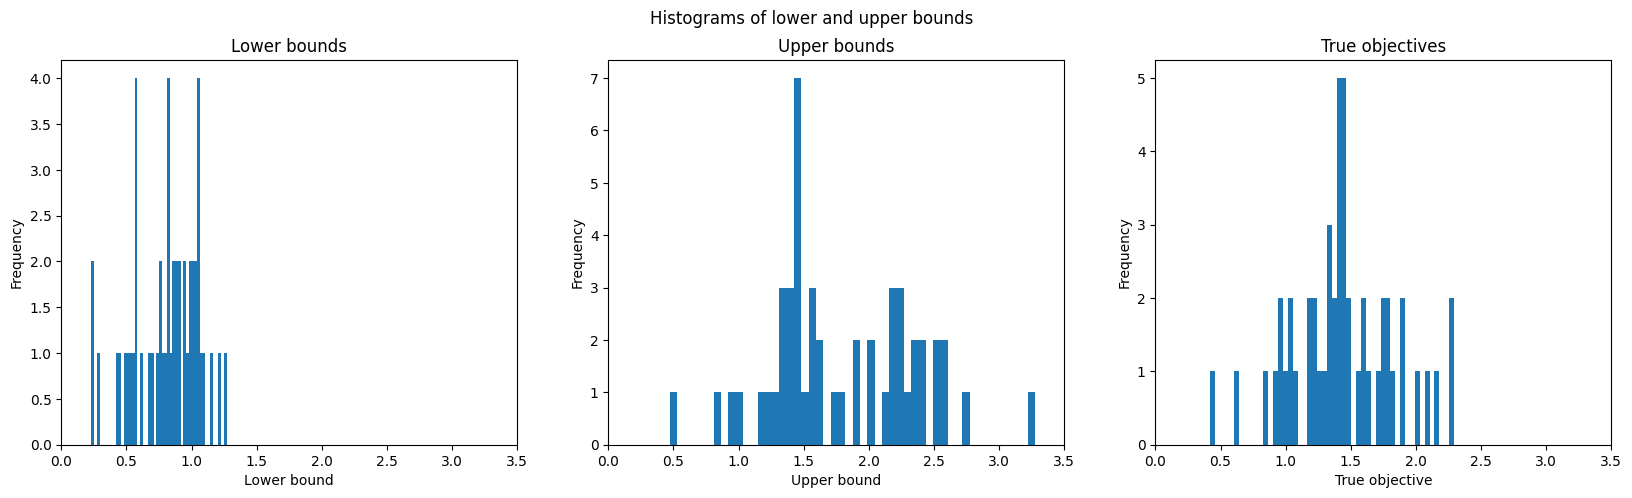

In [19]:
max_lb = 0
max_k = None

for k, v in indexed_db_form.items():

    lb = [e.results["lower_bound"] for e in v]

    mean_lb = sum(lb) / len(lb)

    if mean_lb > max_lb:
        max_lb = mean_lb
        max_k = k

print(f"Max lower bound: {max_lb}\n{max_k=}")

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Histograms of lower and upper bounds")
ax[0].hist([e.results["lower_bound"] for e in indexed_db_form[max_k]], bins=50)
ax[0].set_title("Lower bounds")
ax[0].set_xlabel("Lower bound")
ax[0].set_ylabel("Frequency")

ax[1].hist([e.results["upper_bound"] for e in indexed_db_form[max_k]], bins=50)
ax[1].set_title("Upper bounds")
ax[1].set_xlabel("Upper bound")
ax[1].set_ylabel("Frequency")

ax[2].hist(true_obj, bins=50)
ax[2].set_title("True objectives")
ax[2].set_xlabel("True objective")
ax[2].set_ylabel("Frequency")

ax[0].set_xlim(0, 3.5)
ax[1].set_xlim(0, 3.5)
ax[2].set_xlim(0, 3.5)


plt.show()

In [30]:
k = ('solver_options', 'MaxIter=1 DoLocal=1 NumLoc=50 TDo=1 MDo=1 LBTTDo=1 OBTTDo=1 PDo=-2', 'formulation_arguments', frozenset({('use_obj_lb', False), ('use_convex_hull', True), ('use_better_obj', False), ('use_bind_first_steiner', True)}))

d = indexed_db_form[k]

lb = [r.results["lower_bound"] for r in d]
print(sum(lb)/len(lb))

0.8053532297416591
